# Business Case Subject:

### Exploring the Car Rental Industry  










<h2 id='part1'>A Look at the Data</h2>

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Importing the Dataset

In [2]:
# Define path location for the dataset, and load it into the "data" dataframe.

file_path = 'CarRental.csv'
data = pd.read_csv(file_path)

## Data Understanding:

### Dataset Structure Exploration

In [3]:
# Display the first 5 rows of the dataset.
data.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


In [4]:
# get the number of the rows and columns and display them.
rows = data.shape[0]
columns = data.shape[1]

print(f'There are {rows} rows and {columns} columns in the dataset.')

There are 5851 rows and 15 columns in the dataset.


In [6]:
# call the info() function to display some details about the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 685.8+

### Dataset Columns Description:

**fuelType** : Type of Fuel Used by Car.  
**rating** : Cumulative Ratings Given for the Car.  
**renterTripsTaken** : No. of total trips taken for the Car (period unknown).  
**reviewCount** : No. of reviews given for the Car.  
**location.city** : City Location of Car.  
**location.country** : Country Location of the Car.  
**location.latitude** : Latitude of Car's Location.  
**location.longitude** : Longitude of Car's Locaiton.  
**location.state** : State in Which the Car is Located.  
**owner.id** : Owner's ID.  
**rate.daily** : the car rental cost per day (in U.S $).  
**vehicle.make** : make of the car.  
**vehicle.model** : model of the car.  
**vehicle.type** : type of the car.  
**vehicle.year** : make year of the car.   


In [8]:
# call the describe() function to get some statistics for the numerical columns.
data.describe()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
count,5350.000000,5851.000000,5851.000000,5851.000000,5851.000000,5.851000e+03,5851.000000,5851.000000
mean,4.920325,33.477354,28.454794,35.582889,-99.632773,6.034830e+06,93.691506,2015.340113
std,0.182425,41.898954,35.136113,6.431408,20.391476,4.646022e+06,96.080920,4.050813
min,1.000000,0.000000,0.000000,21.272565,-158.165693,5.105000e+03,20.000000,1955.000000
25%,4.900000,5.000000,4.000000,30.453623,-117.158285,1.917451e+06,45.000000,2014.000000
50%,5.000000,18.000000,16.000000,35.554502,-95.673319,4.968749e+06,69.000000,2016.000000
75%,5.000000,46.000000,39.000000,39.996864,-81.538631,9.657496e+06,110.000000,2018.000000
max,5.000000,395.000000,321.000000,64.893610,-68.823637,1.581088e+07,1500.000000,2020.000000


In [9]:
# use the isnull() function to display some details about the missing values.
data.isnull().sum()

fuelType               75
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
dtype: int64

#### There are 75 missing values in the "fuelType" column, and 501 in the "rating" column.

In [10]:
# use the duplicaated() function to find the duplicates.
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [11]:
print(data.shape)
print(data.duplicated().sum())
summary = pd.DataFrame({
    'Unique':data.nunique(),
    'Null':data.isna().sum(),
    'NullPercent':data.isna().sum() / len(data),
    'Type':data.dtypes.values
})
display(summary)

(5851, 15)
0


,Unique,Null,NullPercent,Type
fuelType,4,75,0.012818,object
rating,80,501,0.085626,float64
renterTripsTaken,238,0,0.000000,int64
reviewCount,203,0,0.000000,int64
location.city,971,0,0.000000,object
location.country,1,0,0.000000,object
location.latitude,5839,0,0.000000,float64
location.longitude,5834,0,0.000000,float64
location.state,46,0,0.000000,object
owner.id,3093,0,0.000000,int64


## Data Preparation

### Dealing with missing values

We have 75 missing records for the fuel type values, and 501 for the rating values.  
For the fuel type, the "GASOLINE" cars represnts about 82.2% of th total cars. Therefore, we will use it as the **mode** to fill the missing records.  
For the rating, we will use the **median** to fill the missing records since this is a numerical feature.

In [30]:
# Filling the missing values in fuelType using the mode
FT_mode = data['fuelType'].mode()[0]
data['fuelType'] = data['fuelType'].fillna(FT_mode)

In [31]:
# Filling the missing values in rating using the median
RT_median = data['rating'].median()
data['rating'] = data['rating'].fillna(RT_median)

In [32]:
# check for missing values again.
data.isnull().sum()

fuelType              0
rating                0
renterTripsTaken      0
reviewCount           0
location.city         0
location.country      0
location.latitude     0
location.longitude    0
location.state        0
owner.id              0
rate.daily            0
vehicle.make          0
vehicle.model         0
vehicle.type          0
vehicle.year          0
dtype: int64

### Dataset Cleaning  

#### Since all the data is collected from the U.S states. We can delete the "location.country" column.

In [33]:
# dro the "location.country" column
data.drop('location.country', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

### Different Car Distributions:

In [34]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category'])

# Calculate mode and cardinality for each categorical column
for col in categorical_columns.columns:
    mode_value = categorical_columns[col].mode()[0]  # mode()[0] gets the most frequent value
    cardinality = categorical_columns[col].nunique()  # number of unique values
    print(f"Column: {col}")
    print(f"Mode: {mode_value}")
    print(f"Cardinality: {cardinality}\n")

Column: fuelType
Mode: GASOLINE
Cardinality: 4

Column: location.city
Mode: Las Vegas
Cardinality: 971

Column: location.state
Mode: CA
Cardinality: 46

Column: vehicle.make
Mode: Tesla
Cardinality: 54

Column: vehicle.model
Mode: Model 3
Cardinality: 526

Column: vehicle.type
Mode: car
Cardinality: 5



In [35]:
# Define the target columns, and their labels:
car_columns = ['fuelType', 'vehicle.type', 'vehicle.make', 'vehicle.model', 'vehicle.year']
car_labels = ["Fuel Type", "Car Type", "Car Make", "Car Model", "Car Year"]

In [36]:
# this function takes a dataframe as an input, and shows the different distributions for the target columns in the dataframe.
def display_vehicle_distributions(df):    
    for col, label in zip(car_columns, car_labels):
        car_distribution = df[col].value_counts()
        print(f"\nDistribution by {label}:")
        print(car_distribution)

In [38]:
# call the "display_vehicle_distributions" function
display_vehicle_distributions(data)


Distribution by Fuel Type:
fuelType
GASOLINE    4885
ELECTRIC     622
HYBRID       274
DIESEL        70
Name: count, dtype: int64

Distribution by Car Type:
vehicle.type
car        3659
suv        1714
minivan     232
truck       191
van          55
Name: count, dtype: int64

Distribution by Car Make:
vehicle.make
Tesla            598
Toyota           591
BMW              456
Ford             436
Chevrolet        431
Mercedes-Benz    342
Nissan           291
Jeep             279
Honda            257
Porsche          187
Hyundai          183
Dodge            182
Audi             169
Kia              154
Volkswagen       136
Lexus            121
Land Rover        93
Subaru            83
Mazda             71
Maserati          67
GMC               66
Jaguar            58
Chrysler          57
Acura             50
Mercedes-benz     49
Polaris           46
Cadillac          44
FIAT              42
Infiniti          38
MINI              31
Mitsubishi        29
Volvo             22
Alfa Romeo 

In [39]:
# this function takes a dataframe as an input, and plots the different distributions for the target columns in the dataframe.
def plot_vehicle_distributions(df):
    plt.figure(figsize=(10, 25))
    for i, (col, label) in enumerate(zip(car_columns, car_labels), 1):
        plt.subplot(len(car_columns), 1, i)
        if col == 'vehicle.model':
            df[col].value_counts().nlargest(20).plot(kind='bar')
        else:
            df[col].value_counts().plot(kind='bar')
        plt.title(f"Distribution by {label}")
        plt.xlabel(label)
        plt.ylabel("Count")
    
    
    plt.tight_layout()
    plt.show()

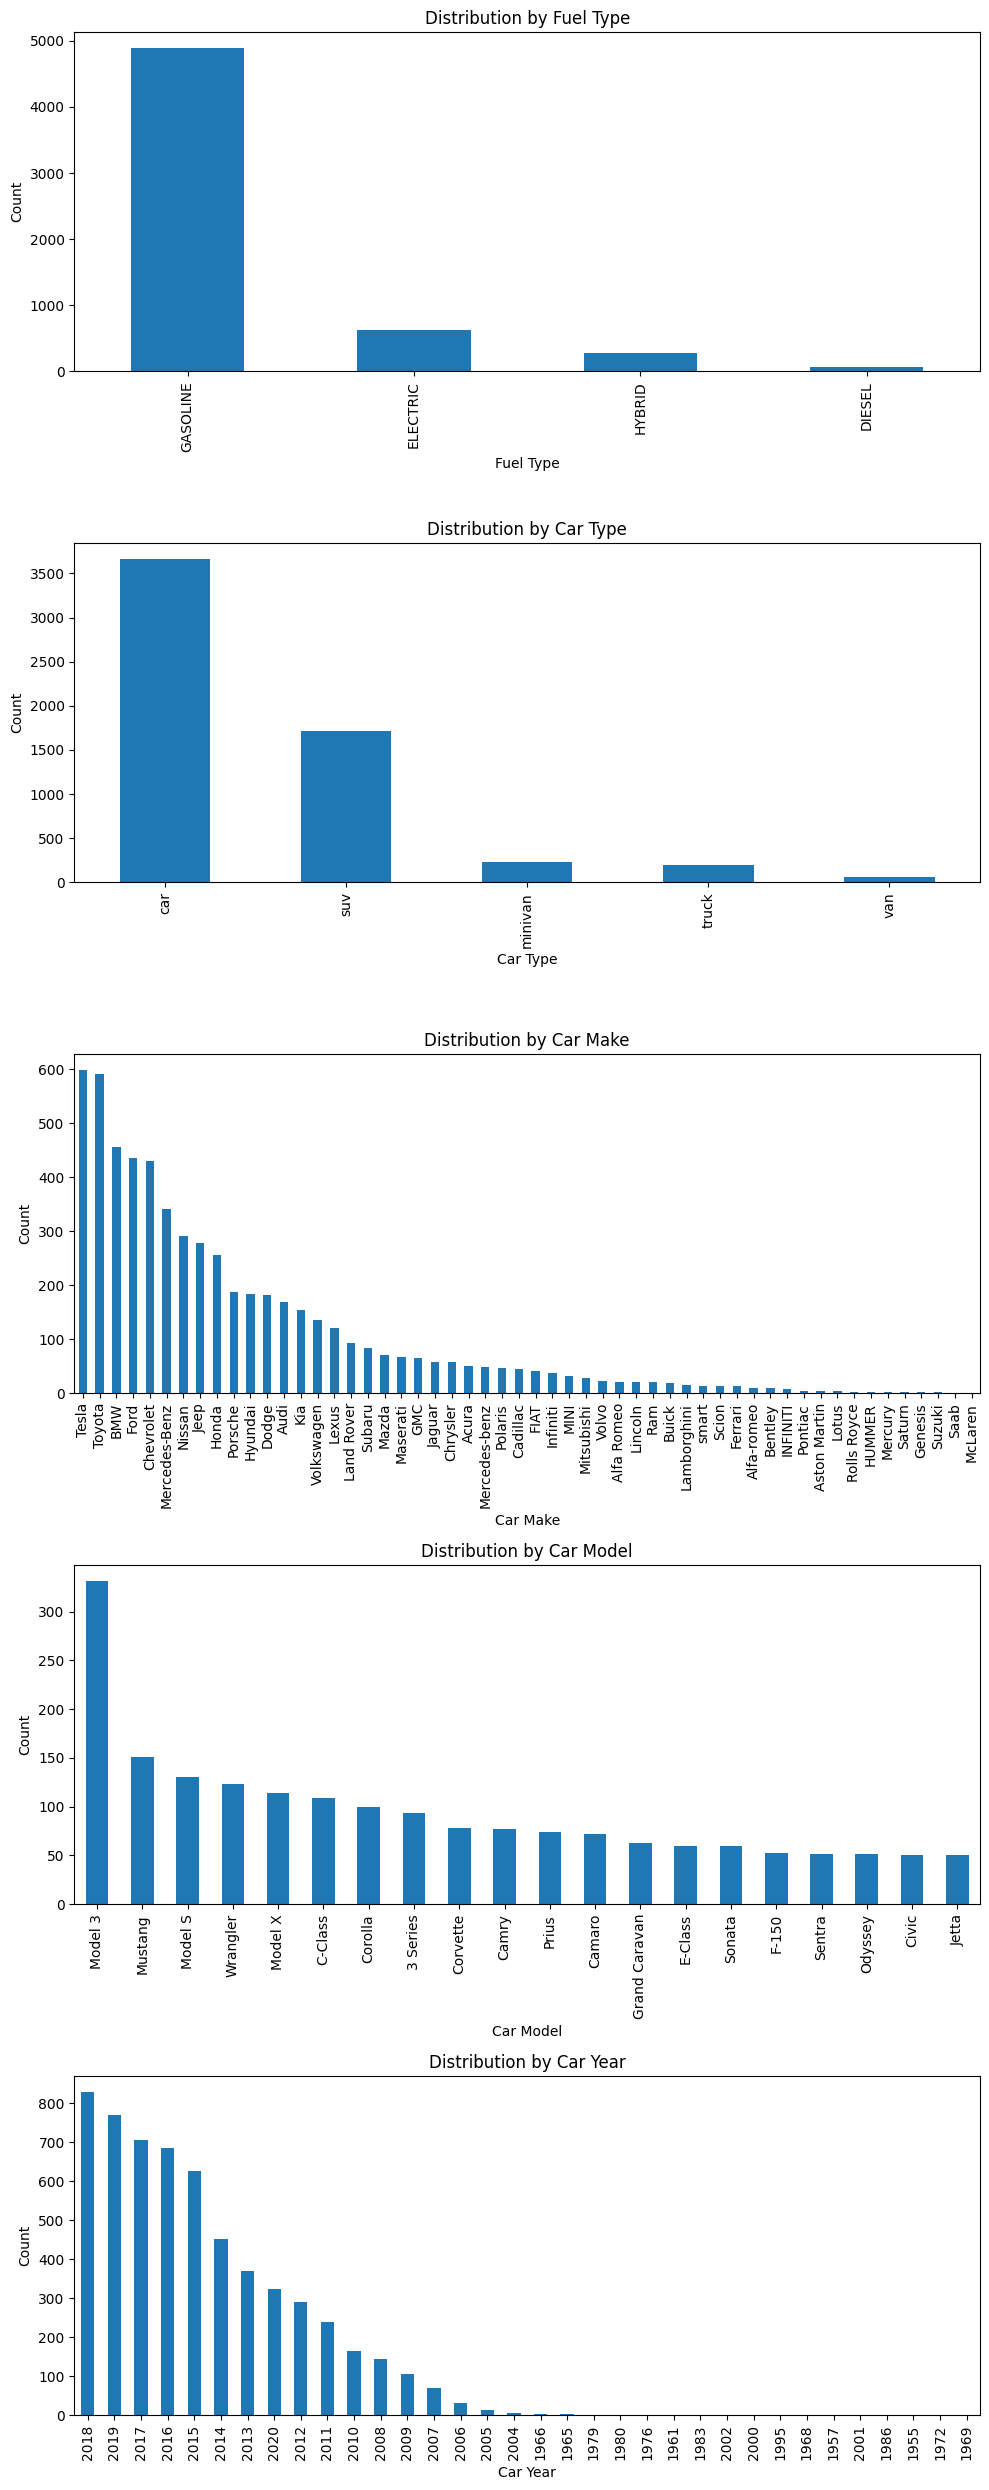

In [40]:
# call the "plot_vehicle_distributions" function:
plot_vehicle_distributions(data)

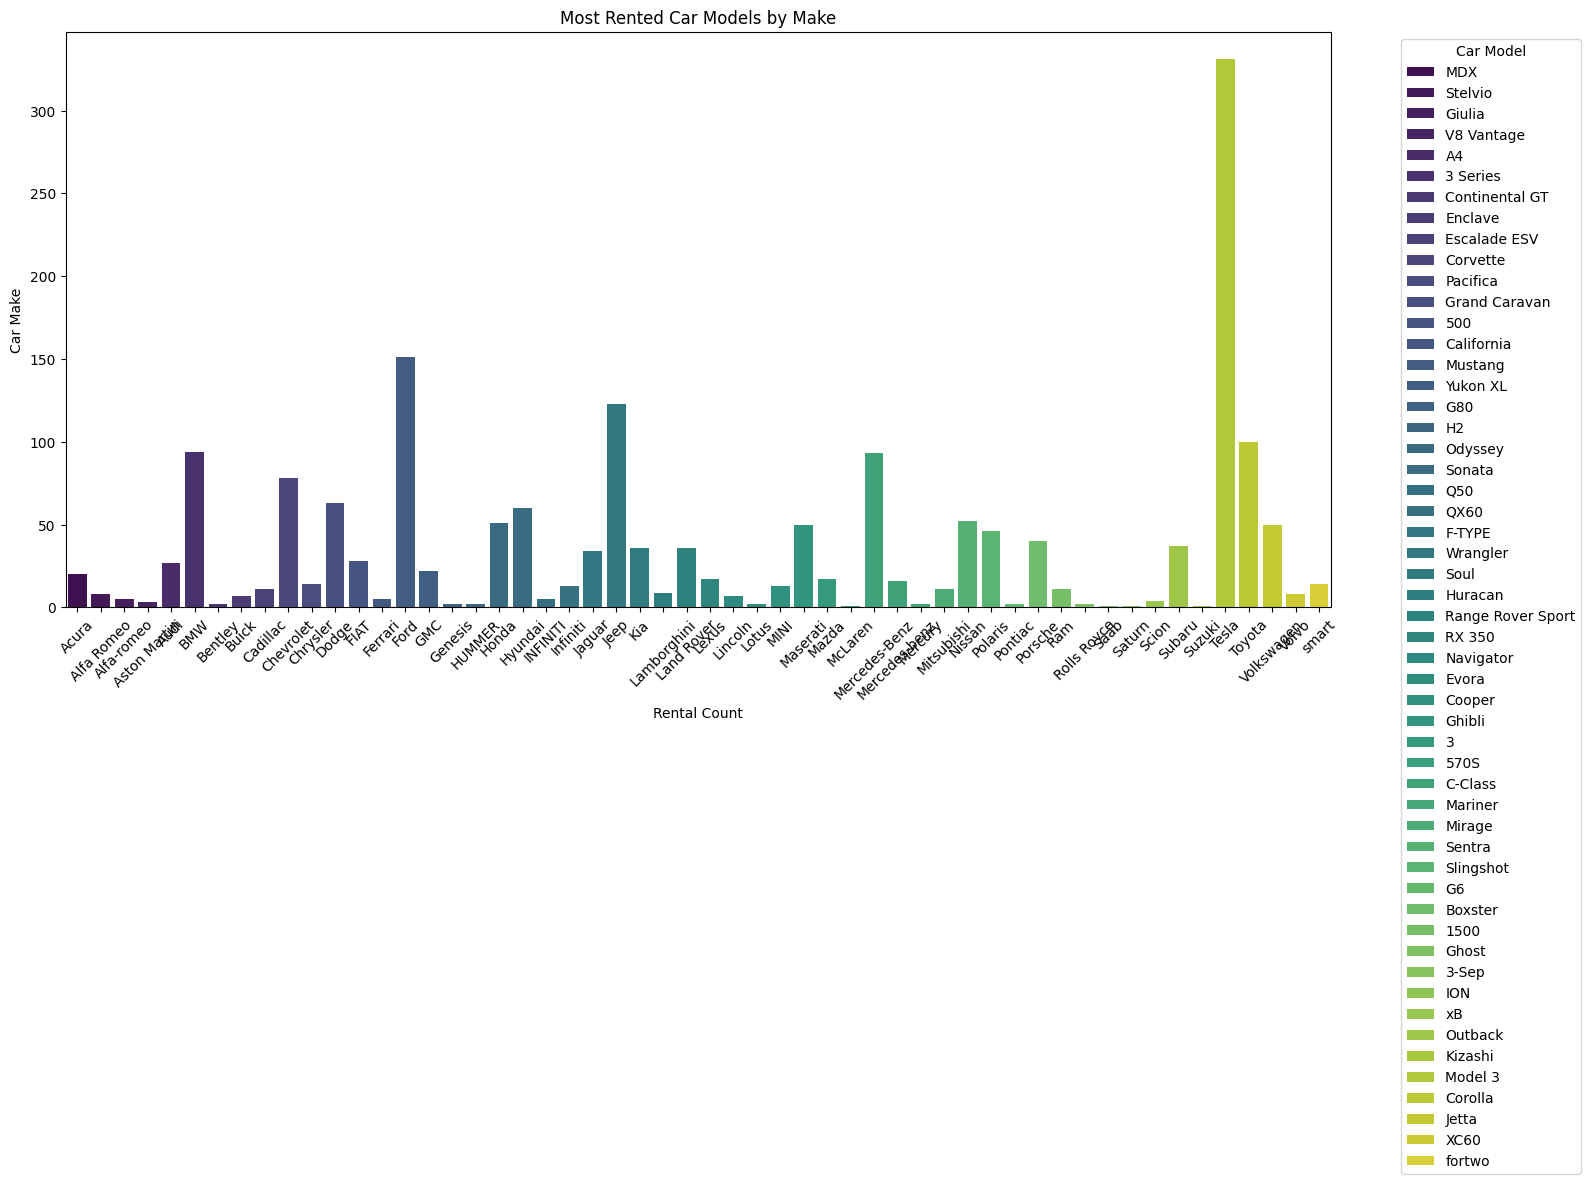

In [50]:
grouped_data = data.groupby(['vehicle.make', 'vehicle.model']).size().reset_index(name='rental_count')
    
# Get the most rented model for each make
most_rented_models = grouped_data.loc[grouped_data.groupby('vehicle.make')['rental_count'].idxmax()]
    
# Plot the data
plt.figure(figsize=(16, 10))
sns.barplot(
    data=most_rented_models,
    x='vehicle.make',
    y='rental_count',
    hue='vehicle.model',
    dodge=False,
    palette="viridis"
)
plt.title('Most Rented Car Models by Make')
plt.xlabel('Rental Count')
plt.ylabel('Car Make')
plt.legend(title='Car Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Car Rental Distribution by Location

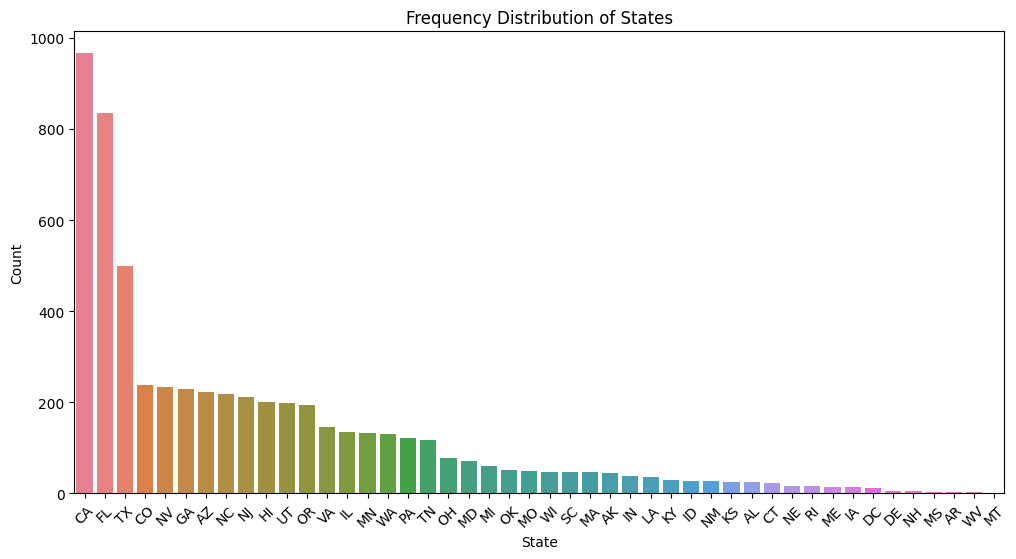

In [42]:
# plot for car rental by states.

state_counts = data['location.state'].value_counts()
    
# Plot a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, dodge=False, legend=False)
plt.title('Frequency Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [43]:
# The top 5 states for car rentals.
top_5_states = data['location.state'].value_counts().head(5)
top_5_states

location.state
CA    966
FL    836
TX    499
CO    238
NV    233
Name: count, dtype: int64

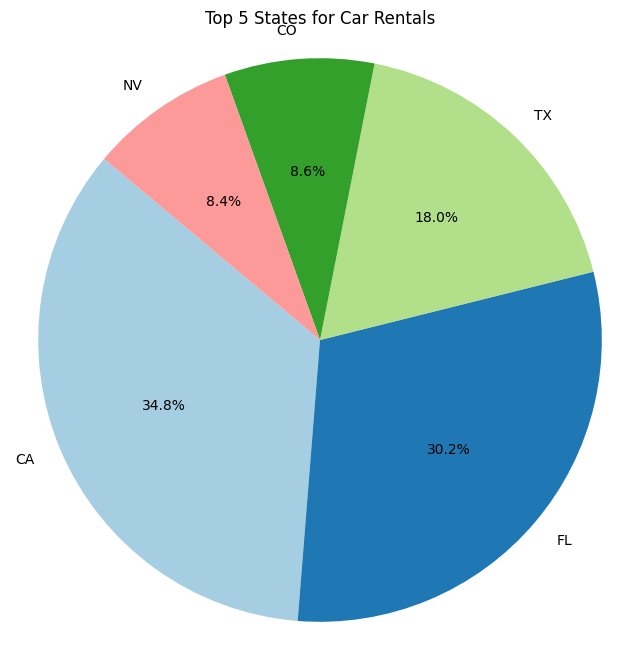

In [44]:
# Plot of the top 5 states for car rentals.
plt.figure(figsize=(8, 8))
plt.pie(top_5_states.values, labels=top_5_states.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 States for Car Rentals')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

### Car Rental Distribution by Car Owner

In [45]:
# The top 5 car owners.
top_5_owners = data['owner.id'].value_counts().head(5)
top_5_owners

owner.id
1300675    49
4009047    47
64265      40
2459011    38
1300139    33
Name: count, dtype: int64

In [46]:
top_5_owners_list = top_5_owners.index
top_owners_data = data[data['owner.id'].isin(top_5_owners_list)]
    
# Count how many times each owner's cars have been rented
rented_counts = top_owners_data.groupby('owner.id')['renterTripsTaken'].count()
    
# Find the owner with the most rentals
most_rented_owner = rented_counts.idxmax()
most_rented_count = rented_counts.max()
    
print(f"The owner with the most rentals among the top 5 owners is '{most_rented_owner}' with {most_rented_count} rentals.")

The owner with the most rentals among the top 5 owners is '1300675' with 49 rentals.


### Top Used Cars by Daily Rate: 

Number of Vehicles in Each Daily Rate Range:
rate_range
0-50       1872
51-100     2301
101-150     885
151-200     412
201-300     250
301-500      84
500+         47
Name: count, dtype: int64


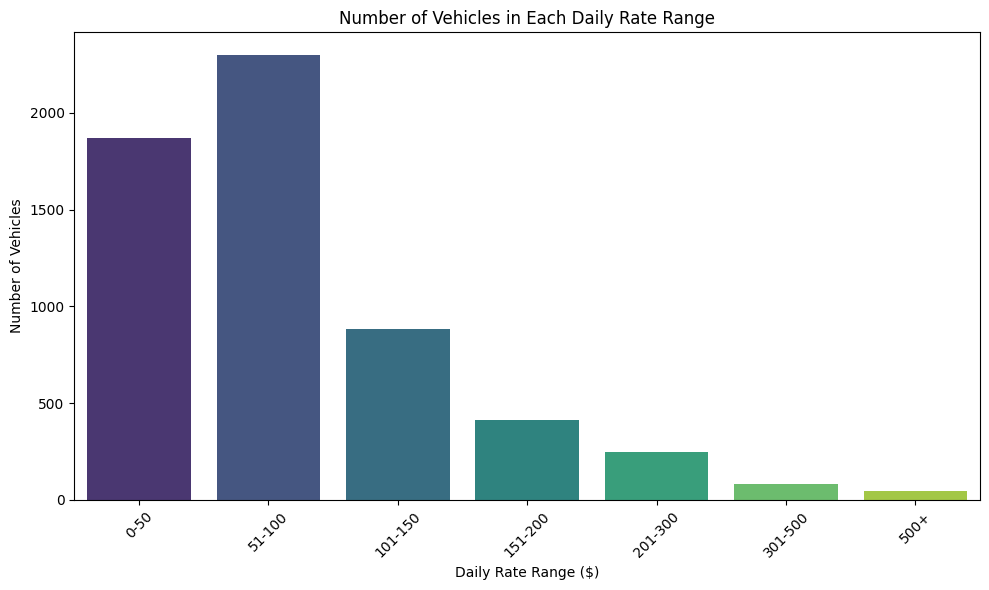

In [51]:
# Define the bins for daily rate ranges
bins = [0, 50, 100, 150, 200, 300, 500, float('inf')]  # Adjust ranges as needed
labels = ['0-50', '51-100', '101-150', '151-200', '201-300', '301-500', '500+']
    
# Create a new column for rate ranges
data['rate_range'] = pd.cut(data['rate.daily'], bins=bins, labels=labels, right=False)
    
# Count the number of vehicles in each rate range
rate_range_counts = data['rate_range'].value_counts().sort_index()
    
# Display the results
print("Number of Vehicles in Each Daily Rate Range:")
print(rate_range_counts)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=rate_range_counts.index, y=rate_range_counts.values, hue=rate_range_counts.index, dodge=False, palette="viridis", legend=False)
plt.title('Number of Vehicles in Each Daily Rate Range')
plt.xlabel('Daily Rate Range ($)')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see, the top rented cars are those with the daily rate between 51 and 100 U.S$.

### Daily Rates by Car Type

vehicle.type
van        112.454545
car         95.413501
suv         95.268378
truck       81.109948
minivan     60.793103
Name: rate.daily, dtype: float64

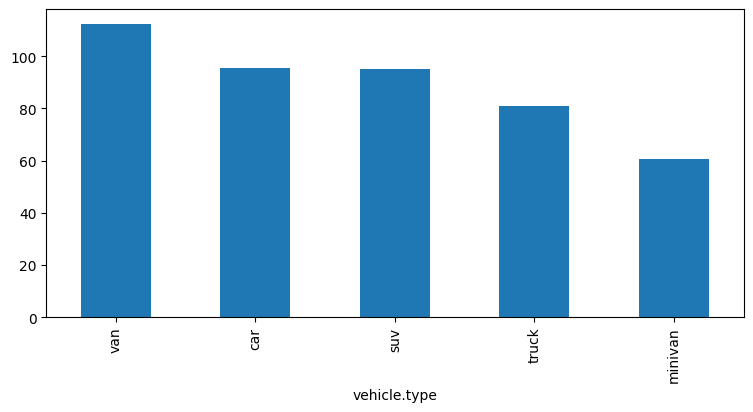

In [47]:
plt.figure(figsize=(9,4))
data.groupby(['vehicle.type'])['rate.daily'].mean().sort_values(ascending=False).plot(kind='bar')
data.groupby(['vehicle.type'])['rate.daily'].mean().sort_values(ascending=False)

### Service Rating

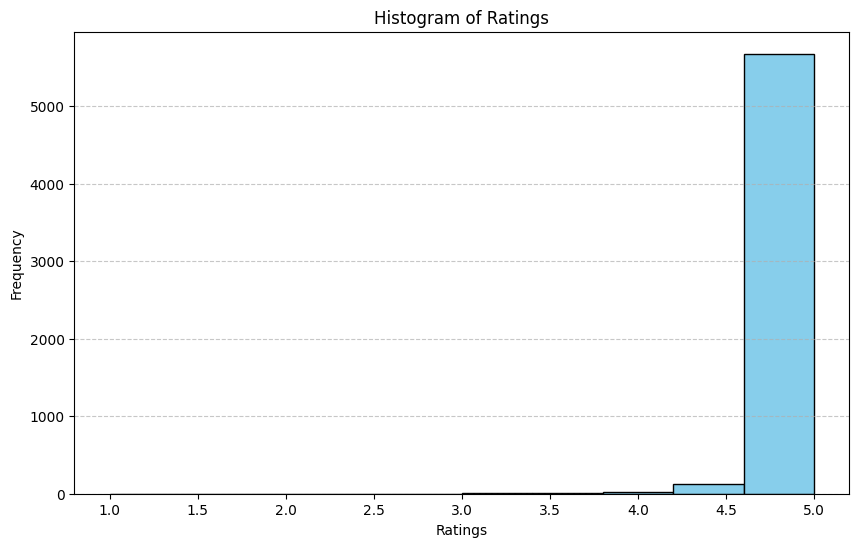

In [49]:
# histogram for car ratings

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### The above histogram shows that most customers gave the rating of 5 for the rental service.